# Writing code with ChatGPT

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Exponential decay

Prompt: <br>
Please write me a forward Euler code that solves the following differential equation $dy(x)/dx = - y(x)$ with the initial condition $y(0) = 1$. I also want the plot of the numerical solution comparing it to the original analytical solution so can you please give me that as well?

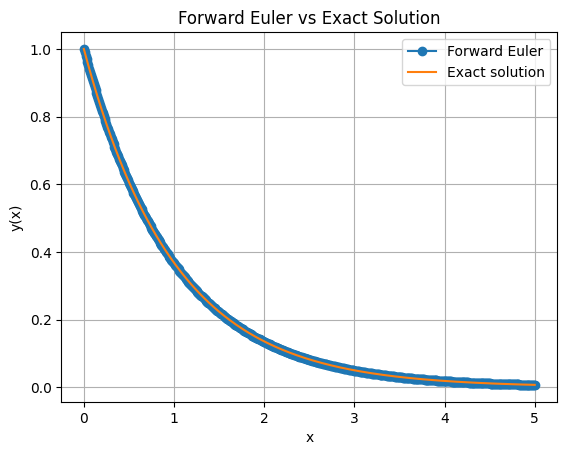

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
h = 0.01             # Step size
x_max = 5           # Maximum x
x_values = np.arange(0, x_max + h, h)  # x grid

# Initialize y array
y_euler = np.zeros(len(x_values))
y_euler[0] = 1      # Initial condition

# Forward Euler loop
for i in range(len(x_values)-1):
    y_euler[i+1] = y_euler[i] + h * (-y_euler[i])

# Exact solution
y_exact = np.exp(-x_values)

# Plotting
plt.plot(x_values, y_euler, 'o-', label='Forward Euler')
plt.plot(x_values, y_exact, '-', label='Exact solution')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Forward Euler vs Exact Solution')
plt.legend()
plt.grid(True)
plt.show()

Prompt: <br>
Can you solve the same differential equation with the predictor corrector scheme?

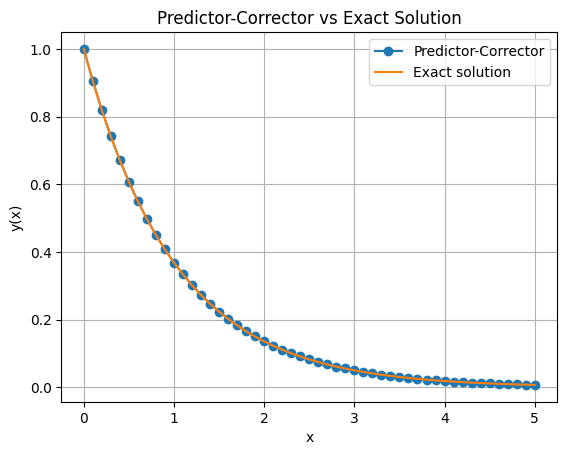

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
h = 0.1
x_max = 5
x_values = np.arange(0, x_max + h, h)

# Initialize y array
y_pc = np.zeros(len(x_values))
y_pc[0] = 1  # Initial condition

# Predictor-Corrector loop
for i in range(len(x_values)-1):
    # Predictor step
    y_star = y_pc[i] + h * (-y_pc[i])
    # Corrector step
    y_pc[i+1] = y_pc[i] + (h/2) * (-y_pc[i] - y_star)

# Exact solution
y_exact = np.exp(-x_values)

# Plotting
plt.plot(x_values, y_pc, 'o-', label='Predictor-Corrector')
plt.plot(x_values, y_exact, '-', label='Exact solution')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Predictor-Corrector vs Exact Solution')
plt.legend()
plt.grid(True)
plt.show()


## Harmonic oscillator

Prompt: <br>
Can you help me solve a second order differential equation? $x''(t) = - \omega^2 x(t)$ subject to the initial conditions $x(0) = 0$ and $x'(0) = 1$. You can set $\omega = 1$. Can you give me both the forward Euler and PC solutions in separate blocks?

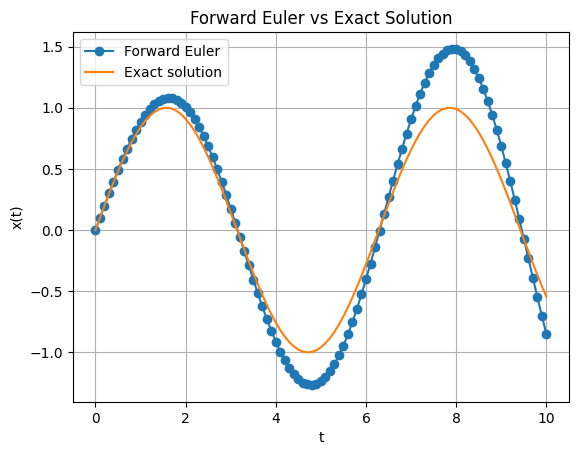

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
h = 0.1
t_max = 10
t_values = np.arange(0, t_max + h, h)

# Initialize arrays
x = np.zeros(len(t_values))
v = np.zeros(len(t_values))

# Initial conditions
x[0] = 0
v[0] = 1

# Forward Euler loop
for i in range(len(t_values)-1):
    x[i+1] = x[i] + h * v[i]
    v[i+1] = v[i] + h * (-x[i])

# Exact solution
x_exact = np.sin(t_values)

# Plot
plt.plot(t_values, x, 'o-', label='Forward Euler')
plt.plot(t_values, x_exact, '-', label='Exact solution')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Forward Euler vs Exact Solution')
plt.legend()
plt.grid(True)
plt.show()


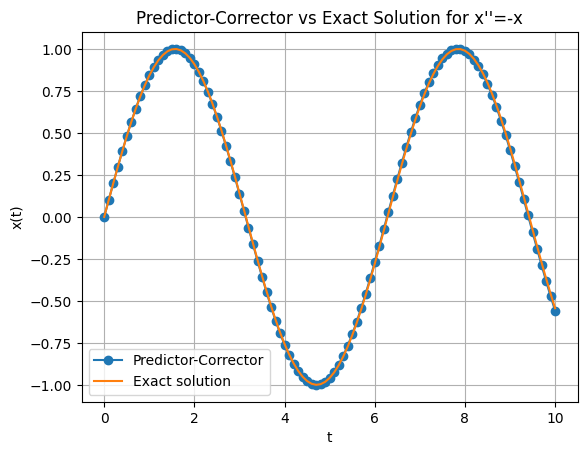

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
h = 0.1          # Step size
t_max = 10       # Maximum time
t_values = np.arange(0, t_max + h, h)

# Initialize arrays
x_pc = np.zeros(len(t_values))
v_pc = np.zeros(len(t_values))

# Initial conditions
x_pc[0] = 0
v_pc[0] = 1

# Predictor-Corrector loop
for i in range(len(t_values)-1):
    # Predictor step
    x_star = x_pc[i] + h * v_pc[i]
    v_star = v_pc[i] + h * (-x_pc[i])
    
    # Corrector step
    x_pc[i+1] = x_pc[i] + (h/2) * (v_pc[i] + v_star)
    v_pc[i+1] = v_pc[i] + (h/2) * (-x_pc[i] - x_star)

# Exact solution
x_exact = np.sin(t_values)

# Plotting
plt.plot(t_values, x_pc, 'o-', label='Predictor-Corrector')
plt.plot(t_values, x_exact, '-', label='Exact solution')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Predictor-Corrector vs Exact Solution for x\'\'=-x')
plt.legend()
plt.grid(True)
plt.show()


## Damped harmonic oscillator

Prompt: <br>
Can you now write me the code for a damped harmonic oscillator $x''(t) + 2 \zeta \omega_0 x'(t) + \omega_0^2 x(t) = 0$ here $\omega_0$ is the free oscillator frequency. You can set it to 1. And $\zeta$ is the damping ratio. Can you plot the three different cases for damping: underdamped, overdamped and critically damped?

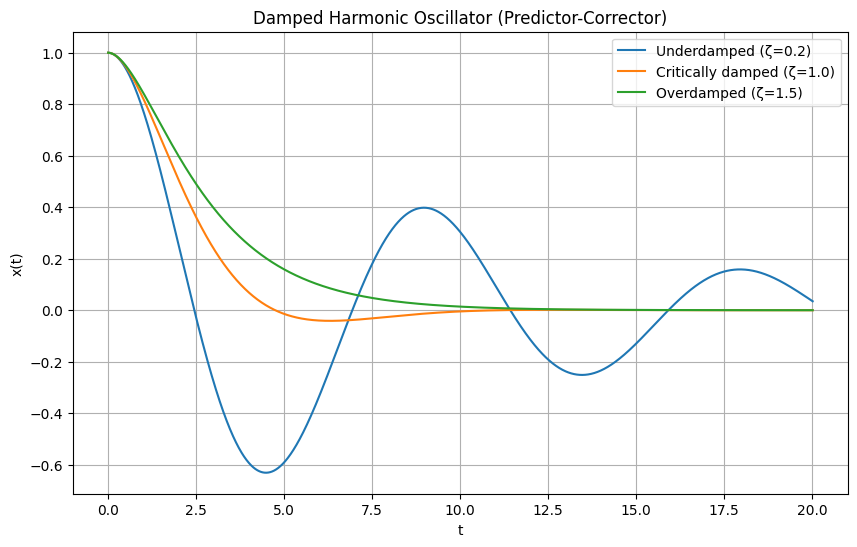

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
h = 0.01          # Step size
t_max = 20
t_values = np.arange(0, t_max + h, h)
omega0 = 1.0

# Damping ratios for different cases
damping_cases = {
    'Underdamped (ζ=0.2)': 0.2,
    'Critically damped (ζ=1.0)': 1.0,
    'Overdamped (ζ=1.5)': 1.5
}

# Initial conditions
x0 = 1.0
v0 = 0.0

plt.figure(figsize=(10,6))

for label, zeta in damping_cases.items():
    # Initialize arrays
    x = np.zeros(len(t_values))
    v = np.zeros(len(t_values))
    x[0] = x0
    v[0] = v0
    
    # Predictor-Corrector loop
    for i in range(len(t_values)-1):
        # Predictor
        x_star = x[i] + h * v[i]
        v_star = v[i] + h * (-2*zeta*omega0*v[i] - omega0**2 * x[i])
        
        # Corrector
        x[i+1] = x[i] + (h/2) * (v[i] + v_star)
        v[i+1] = v[i] + (h/2) * (-2*zeta*omega0*v[i] - omega0**2 * x_star)
    
    # Plot
    plt.plot(t_values, x, label=label)

plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Damped Harmonic Oscillator (Predictor-Corrector)')
plt.grid(True)
plt.legend()
plt.show()
